In [70]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [131]:
shot_data = pd.read_csv('../data/lbj_shots_tidy.csv')

,Unnamed: 0,SHOT_CLOCK,SHOT_NUMBER,SHOT_DIST,SHOT_RESULT,TOUCH_TIME,PERIOD,PTS_TYPE,DRIBBLES,CLOSE_DEF_DIST
0,1,13.7,1,7.0,missed,9.5,1,2,9,0.8
1,2,15.2,2,5.4,missed,7.9,1,2,8,2.5
2,3,12.3,3,23.2,made,5.6,1,3,0,3.5
3,4,0.0,4,27.1,missed,2.0,1,3,0,3.9
4,5,20.8,5,3.1,made,2.7,2,2,2,3.5


In [122]:
# Get our features for X and target for y from shot_data
X = shot_data.drop(['Unnamed: 0','SHOT_RESULT'], axis = 1)
y = shot_data[['SHOT_RESULT']]

In [123]:
#Split our Dataset by 80-20
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)


0.6938775510204082


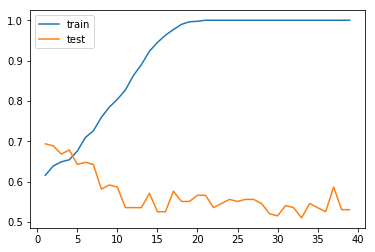

In [130]:
#5-fold CrossValidation Score with different K's
depths = range(1,40)
train_accuracy=[]
test_accuracy=[]
for i in depths:
    shot_model=DecisionTreeClassifier(max_depth=i)
    shot_model.fit(Xtrain,ytrain)
    train_accuracy.append(shot_model.score(Xtrain,ytrain))
    shot_model.predict(Xtest)
    test_accuracy.append(shot_model.score(Xtest,ytest))


plt.plot(depths,train_accuracy, label='train')
plt.plot(depths,test_accuracy, label='test')
plt.legend()

print(max(test_accuracy))

([<matplotlib.axis.XTick at 0x11c02bc50>,
 <a list of 8 Text xticklabel objects>)

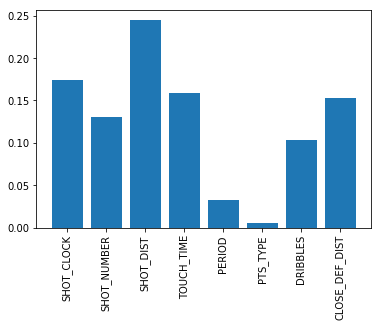

In [125]:
from sklearn.ensemble import RandomForestClassifier

importances = shot_model.feature_importances_


feature_names= pd.DataFrame(list(X))

plt.bar(range(len(X.columns.values)), shot_model.feature_importances_)
plt.xticks(range(len(X.columns.values)),X.columns.values, rotation= 90)

In [104]:

feature_names= list(X) 
print(feature_names)

['SHOT_CLOCK', 'SHOT_NUMBER', 'SHOT_DIST', 'TOUCH_TIME', 'PERIOD', 'PTS_TYPE', 'DRIBBLES', 'CLOSE_DEF_DIST']
